# Book Crossing Recommendation 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Applying ML Algorithms</a></li>
<li><a href="#conclusion">Conclusion</a></li>

</ul>

<a id='intro'></a>
## Introduction

> ### Overview
>
> BookCrossing is the act of releasing your books "into the wild" for a stranger to find, or via "controlled release" to another BookCrossing member, and tracking where they go via journal entries from around the world. Our community of 1,951,800 passionate, generous book-lovers is changing the world and touching lives, one traveling book at a time.
>


### Explaining Dataset

>The BookCrossing (BX) dataset was collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. It contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.
 
> BX-Users
Contains the users. Note that user IDs (`User-ID`) have been anonymized and map to integers. Demographic data is provided (`Location`, `Age`) if available. Otherwise, these fields contain NULL-values.

> BX-Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (`Book-Title`, `Book-Author`, `Year-Of-Publication`, `Publisher`), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (`Image-URL-S`, `Image-URL-M`, `Image-URL-L`), i.e., small, medium, large. These URLs point to the Amazon web site.

> BX-Book-Ratings
Contains the book rating information. Ratings (`Book-Rating`) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


>That's what BookCrossing is all about...(from the BookCrossing Website)
We are a community of book lovers who enjoy sharing our books with others. It's a simple process of adding a BookCrossing label to your books and then “releasing” them into the wild. And logging in here to see who finds them and where in the world they end up.
It's fun and exciting to “follow” your books as they travel around the world and take on a life of their own. Who know where they'll go and who will find them and return here to enter the ID from your labels...

## EDA Questions

>1) What are the 10 publishers with the most entries in the books table?

>2) What are the 10 authors with the most entries in the book table?

>3) What are the 10 book titles with the most entries in the book table?

>4) What are the 15 users with the most ratings?

>5) Which books have the highest cumulative book rating values?

>6) What about the highest average ratings with a minimum of at least 100 ratings received ? 

<a id='wrangling'></a>
## Data Wrangling

> After uploading the data, We will perform the clearing, deleting, editing and explore operations in this section in order to get it ready for predict. Therefore, We need some important libraries which are has been imported at below.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
import seaborn as sns
import missingno as msno
warnings.filterwarnings('ignore') # Turn off warnings
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from surprise import Reader, Dataset
from sklearn import model_selection
from surprise import SVD, NMF, model_selection, accuracy

In [2]:
# read csv documents 
users = pd.read_csv('BX-Users.csv', sep=';',error_bad_lines=False)
books = pd.read_csv('BX-Books.csv', sep=';',error_bad_lines=False)
book_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';',error_bad_lines=False)

In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.name = 'Users'
books.name = 'Books'
book_ratings.name = 'Book_Ratings'
all_df = [users, books, book_ratings]

In [7]:
for df in all_df:
    print(df.name + '_Shape : '+ str(df.shape))

Users_Shape : (278858, 3)
Books_Shape : (271379, 8)
Book_Ratings_Shape : (1149780, 3)


In [8]:
# let's rename columns to get looks more tidy
for df in all_df:
    df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')
    

In [9]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
book_ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Firstly, We will explore User data frame.


In [12]:
# We looked there is a duplicated Id or not?

uniq_users = users.user_id.nunique()
all_users = users.user_id.count()
if uniq_users == all_users:
    print("There is no duplicated Id.")
else:
    print("There are some duplicated Id : " + str(all_users - uniq_users) )


There is no duplicated Id.


 Max Age is :244.0
 Min Age is :0.0


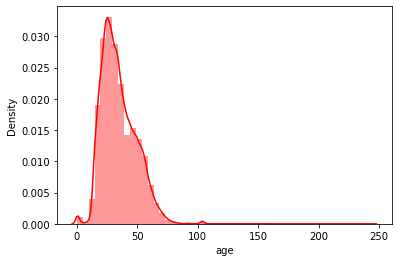

In [13]:
# let's have look for age column distrubtion.
sns.distplot(users.age, color = 'red')
plt.rcParams['figure.figsize'] = [7, 5]
max_age = users.age.max()
min_age = users.age.min()
print(" Max Age is :" +str(max_age))
print(" Min Age is :" +str(min_age))

> As we can see at above chart age range is 0 to 244.

In [14]:
# let's convert data that outside the range 0 to 100 by nan.
users.loc[(users.age<5) | (users.age>100), 'age'] = np.nan

 Max Age is :100.0
 Min Age is :5.0


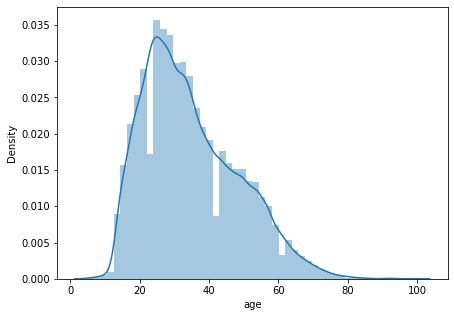

In [15]:
sns.distplot(users.age)
plt.rcParams['figure.figsize'] = [7, 5]
max_age = users.age.max()
min_age = users.age.min()
print(" Max Age is :" +str(max_age))
print(" Min Age is :" +str(min_age))

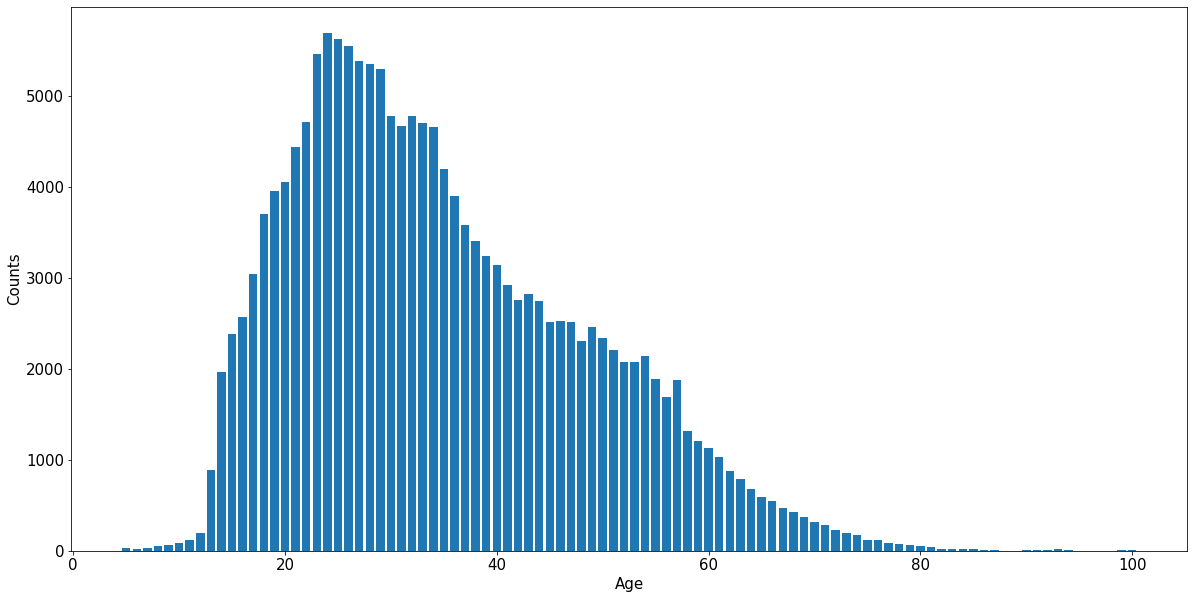

In [16]:
# each age is represented individually
u = users.age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

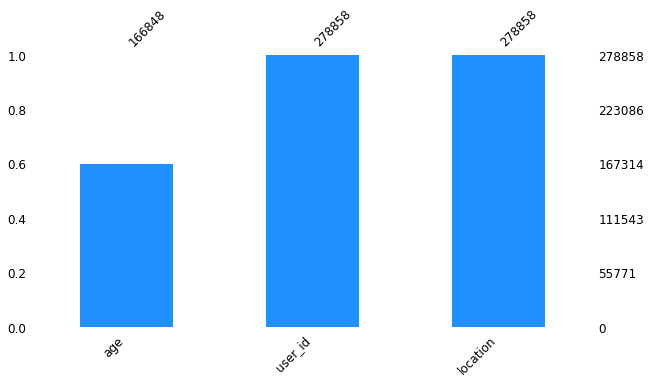

In [17]:
msno.bar(users,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

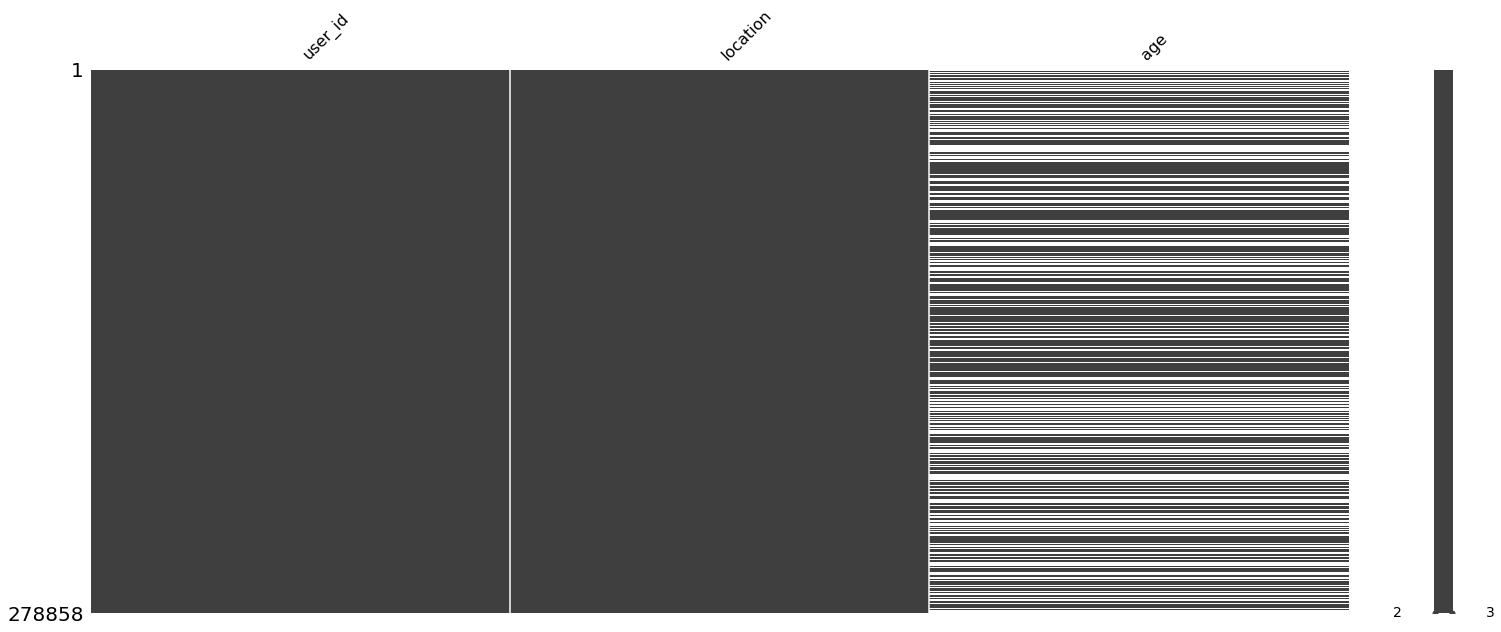

In [18]:
msno.matrix(users);

> Or data looks like Missing Completely at Random (MCAR).
>
> So, as we can see at above our age column approximately %40 is empty. Therefore we decided to not go forward in the modeling section with age column.
>

In [19]:
# Now we can expand location column for look deeply our missings.
user_location_expanded = users.location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['city', 'state', 'country']
users = users.join(user_location_expanded)

In [20]:
users.drop(columns=['location'], inplace=True)
users.head()

,user_id,age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


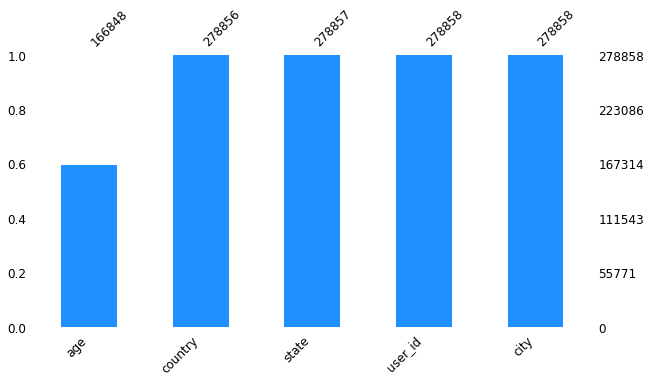

In [21]:
msno.bar(users,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [22]:
empty_string_country = users[users.country == ''].country.count()
nan_country = users.country.isnull().sum()
print("Nan country: "+ str(nan_country))

Nan country: 2


In [23]:
users.country.replace('', np.nan, inplace=True) # we change empty values to nan
nan_country = users.country.isnull().sum()
print("Nan country: "+ str(nan_country))

Nan country: 4563


>We did not fill or drop our missing values after tidy up files we will decide that for modeling section.


### Second, We will explore Book data frame.

In [24]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [25]:
books.tail()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [26]:
# image will not need for recommendation 
books.drop(columns=['image_url_s', 'image_url_m', 'image_url_l'], inplace=True) # drop image-url columns

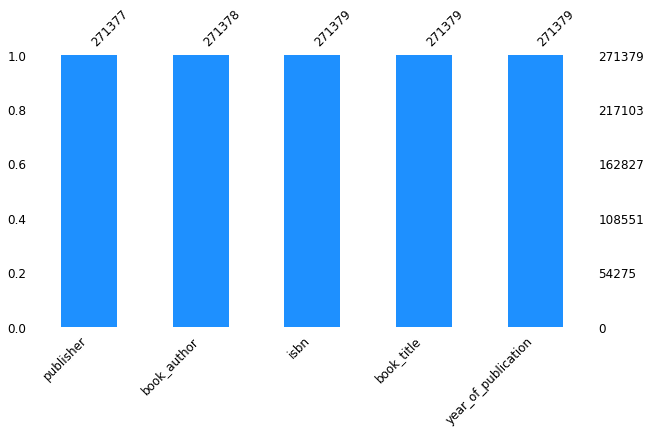

In [27]:
msno.bar(books,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [28]:
# we convert year_of_publication column numeric values.
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

In [29]:
# let's have look there is 0 year or not?

zero_yr = books[books.year_of_publication == 0].year_of_publication.count()
zero_yr

4619

In [30]:
# Replace all years of zero with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

 Max year_of_publication is :2050.0
 Min year_of_publication is :1376.0


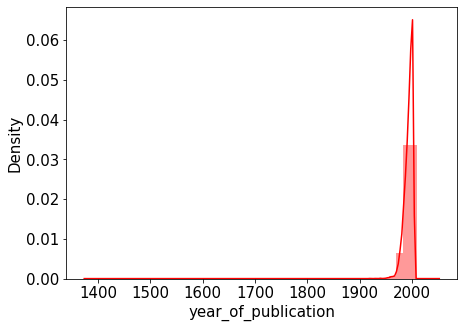

In [31]:
# we will look at distrubution for year_of_publication
sns.distplot(books.year_of_publication, color = 'red')
plt.rcParams['figure.figsize'] = [7, 5]
max_year_books = books.year_of_publication.max()
min_year_books = books.year_of_publication.min()
print(" Max year_of_publication is :" +str(max_year_books))
print(" Min year_of_publication is :" +str(min_year_books))

> As we can see in the chart we have outliers.
>
> We have future published books in our data!

In [32]:
historical_books = books[books.year_of_publication<1800]
books_from_the_future = books[books.year_of_publication>2004] 
# our data has published in 2004 so we could not have publushed books after 2004.
# And we will revove those data from our data set.

print(f'Length of books dataset before removal: {len(books)}')
books = books.loc[~(books.isbn.isin(historical_books.isbn))] # remove historical books
books = books.loc[~(books.isbn.isin(books_from_the_future.isbn))] # remove historical books
print(f'Length of books dataset after removal: {len(books)}')

Length of books dataset before removal: 271379
Length of books dataset after removal: 271305


In [33]:
uniq_books = books.isbn.nunique()
all_books = books.isbn.count()
if uniq_books == all_books:
    print("There is no duplicated book.")
else:
    print("There are some duplicated books : " + str(all_books - uniq_books) )

There is no duplicated book.


In [34]:
# empty publisher 
empty_string_publisher = books[books.publisher == ''].publisher.count()
empty_string_publisher

0

In [35]:
# empty author 
empty_string_author = books[books.book_author == ''].book_author.count()
empty_string_author

0

>Our isbn code is important for use future modeling so they are unique but we can take look with same book. Maybe they have different isbn code. If it is different we should change them. When we modeling our data it will provide make better prediction. Because of they are same book.


In [36]:
# Now we will chose one book and look our isbn code.
books[books.book_title=='Dracula']

,isbn,book_title,book_author,year_of_publication,publisher
2959,156619301X,Dracula,Bram Stoker,1994.0,Dorset Press
5332,055321148X,Dracula,Bram Stoker,1983.0,Bantam
12754,9875021245,Dracula,Bram Stoker,2004.0,Distal
12989,0140052801,Dracula,Bram Stoker,1992.0,Penguin USA
52118,0451175816,Dracula,Bram Stoker,1992.0,New Amer Library Classics
61619,0880299010,Dracula,Bram Stoker,1992.0,Barnes Noble Books
68984,8481301183,Dracula,Bram Stocker,2001.0,Colleccion Millenium
72475,1562542621,Dracula,Emily Hutchinson,1998.0,"Saddleback Publishing, Inc."
82832,0515053473,Dracula,Bram Stoker,1979.0,Berkley Pub Group (Mm)
92503,0863221432,Dracula,Bram Stoker,1992.0,Brandon/Mount Eagle


In [37]:
# Above chart indicate to us same book has different isbn it is problem for we should change that. We will do in modeling part.

### Third, We will explore Book_Ratings data frame.


In [38]:
book_ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


 Max book_rating is :10
 Min book_rating is :0


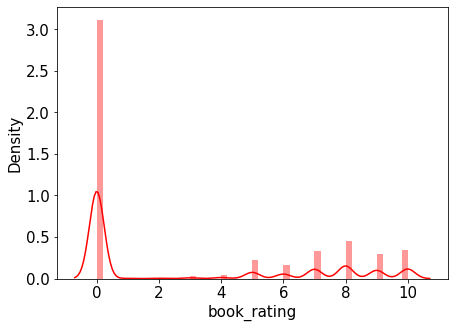

In [39]:
sns.distplot(book_ratings.book_rating, color = 'red')
plt.rcParams['figure.figsize'] = [7, 5]
max_book_rating = book_ratings.book_rating.max()
min_book_rating = book_ratings.book_rating.min()
print(" Max book_rating is :" +str(max_book_rating))
print(" Min book_rating is :" +str(min_book_rating))

In [40]:
# For the modeling step we'll only be looking at explicit ratings, and so the 0 rating entry rows will be removed.
len_before = len(book_ratings)
print('Before Len of book_ratings : '+ str(len_before))

book_ratings = book_ratings[book_ratings.book_rating != 0]

len_after = len(book_ratings)
print('After Len of book_ratings : '+ str(len_after))

rate = "{:.2f}".format((((len_before-len_after)*100)/len_before)) 
    
print('We lost % '+str(rate) + ' of data')

Before Len of book_ratings : 1149780
After Len of book_ratings : 433671
We lost % 62.28 of data


 Max book_rating is :10
 Min book_rating is :1


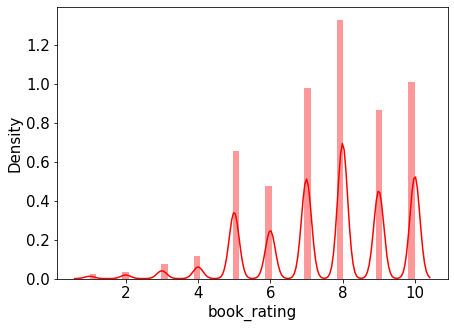

In [41]:
sns.distplot(book_ratings.book_rating, color = 'red')
plt.rcParams['figure.figsize'] = [7, 5]
max_book_rating = book_ratings.book_rating.max()
min_book_rating = book_ratings.book_rating.min()
print(" Max book_rating is :" +str(max_book_rating))
print(" Min book_rating is :" +str(min_book_rating))

In [42]:
super_users = book_ratings.groupby('user_id').isbn.count().sort_values(ascending=False)
print(f'The 20 users with the most ratings:\n{super_users[:20]}')

The 20 users with the most ratings:
user_id
11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
76499     1036
171118    1035
235105    1023
16795      968
248718     948
56399      911
35859      829
63714      811
197659     806
185233     723
95359      619
114368     614
101851     591
177458     584
158295     569
Name: isbn, dtype: int64


<a id='eda'></a>
## Exploratory Data Analysis

#### 1) What are the 10 publishers with the most entries in the books table?

In [43]:
top_publishers = books.publisher.value_counts()[:10]
print(f'The 10 publishers with the most entries in the books table are:\n{top_publishers}')

The 10 publishers with the most entries in the books table are:
Harlequin                   7536
Silhouette                  4220
Pocket                      3903
Ballantine Books            3783
Bantam Books                3647
Scholastic                  3159
Simon &amp Schuster         2968
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64


#### 2) What are the 10 authors with the most entries in the book table? 

In [44]:
top_authors = books.book_author.value_counts()[:10]
print(f'The 10 authors with the most entries in the books table are:\n{top_authors}')

The 10 authors with the most entries in the books table are:
Agatha Christie        632
William Shakespeare    566
Stephen King           524
Ann M. Martin          423
Francine Pascal        373
Carolyn Keene          373
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: book_author, dtype: int64


#### 3) What are the 10 book titles with the most entries in the book table? 

In [45]:
top_titles = books.book_title.value_counts()[:10]
print(f'The 10 book titles with the most entries in the books table are:\n{top_titles}')

The 10 book titles with the most entries in the books table are:
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Adventures of Huckleberry Finn    20
Dracula                           20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: book_title, dtype: int64


#### 4) What are the 15 users with the most ratings?

In [46]:
super_users = book_ratings.groupby('user_id').isbn.count().sort_values(ascending=False)
print(f'The 15 users with the most ratings:\n{super_users[:15]}')

The 15 users with the most ratings:
user_id
11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
76499     1036
171118    1035
235105    1023
16795      968
248718     948
56399      911
35859      829
63714      811
197659     806
185233     723
Name: isbn, dtype: int64


#### 5) which books have the highest cumulative book rating values?

In [47]:
# We will join firstly book data frame and book ratings data frame.
print(f'Books table size: {len(books)}')
print(f'Ratings table size: {len(book_ratings)}')
books_with_ratings = book_ratings.join(books.set_index('isbn'), on='isbn')
print(f'New table size: {len(books_with_ratings)}')

Books table size: 271305
Ratings table size: 433671
New table size: 433671


In [48]:
books_with_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
6,276736,3257224281,8,NaN,NaN,NaN,NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN


In [49]:
books_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              433671 non-null  int64  
 1   isbn                 433671 non-null  object 
 2   book_rating          433671 non-null  int64  
 3   book_title           383765 non-null  object 
 4   book_author          383764 non-null  object 
 5   year_of_publication  377980 non-null  float64
 6   publisher            383763 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 26.5+ MB


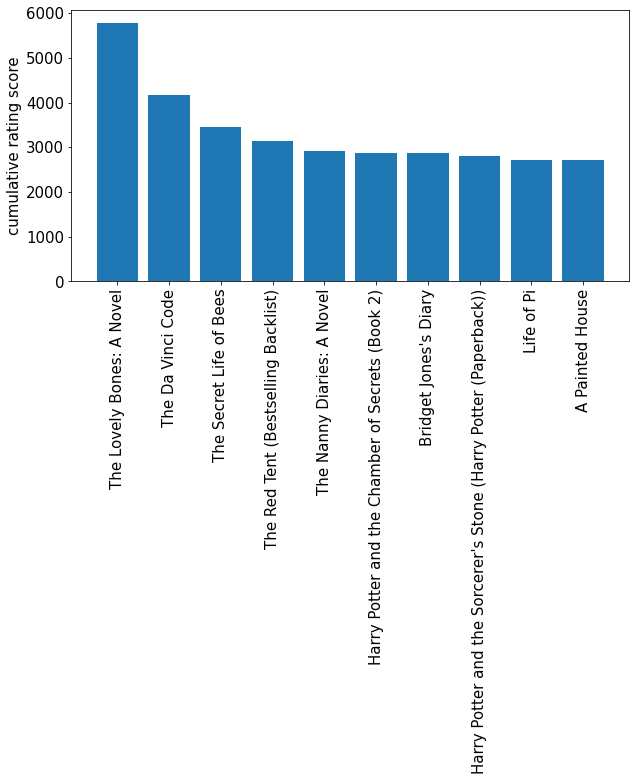

In [50]:
cm_rtg = books_with_ratings.groupby('book_title').book_rating.sum()
cm_rtg = cm_rtg.sort_values(ascending=False)[:10]
idx = cm_rtg.index.tolist() # Get sorted book titles
vals = cm_rtg.values.tolist() # Get corresponding cm_rtg values

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(range(len(idx)), vals)
plt.xticks(range(len(idx)), idx, rotation='vertical')
plt.ylabel('cumulative rating score')
plt.show()

#### 6) What about the highest average ratings with a minimum of at least 100 ratings received ? 

In [51]:
cutoff = books_with_ratings.book_title.value_counts()
mean_rtg = books_with_ratings[books_with_ratings.book_title.isin(cutoff[cutoff>100].index)].groupby('book_title')['book_rating'].mean()
mean_rtg.sort_values(ascending=False)[:10] # show only top 10

book_title
The Two Towers (The Lord of the Rings, Part 2)                      9.330882
The Return of the King (The Lord of the Rings, Part 3)              9.213592
Harry Potter and the Goblet of Fire (Book 4)                        9.125506
Harry Potter and the Sorcerer's Stone (Book 1)                      9.062500
Harry Potter and the Order of the Phoenix (Book 5)                  9.047393
Harry Potter and the Prisoner of Azkaban (Book 3)                   9.043321
To Kill a Mockingbird                                               8.977528
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))    8.936508
Ender's Game (Ender Wiggins Saga (Paperback))                       8.920530
The Fellowship of the Ring (The Lord of the Rings, Part 1)          8.882927
Name: book_rating, dtype: float64

#### How about lowest-rated ?

In [52]:
mean_rtg.sort_values(ascending=False)[-10:] # bottom 10 only

book_title
Hannibal                                      7.138122
We Were the Mulvaneys                         7.057554
A Map of the World                            7.025862
While I Was Gone                              6.950000
The Girls' Guide to Hunting and Fishing       6.945946
Full House (Janet Evanovich's Full Series)    6.920354
The Last Time They Met : A Novel              6.859155
How to Be Good                                6.700000
Isle of Dogs                                  5.433962
Wild Animus                                   4.390706
Name: book_rating, dtype: float64

<a id='ml'></a>
## Applying ML Algorithms

In [53]:
# As we said before same book has different isbn we sholud create unique isbn for them.
# Let's look at isbn that is non unique items based on the book title.
multiple_isbns = books_with_ratings.groupby(['book_title']).isbn.nunique()
multiple_isbns.value_counts()

1     125314
2       7869
3       1497
4        494
5        180
6         86
7         45
8         26
9         11
10         8
14         5
15         2
11         2
18         1
16         1
12         1
Name: isbn, dtype: int64

In [54]:
has_mult_isbns = multiple_isbns.where(multiple_isbns>1)
has_mult_isbns.dropna(inplace=True) 
print(f'We will create new isbn for {len(has_mult_isbns)}  rows')

We will create new isbn for 10228  rows


In [55]:
def make_isbn_dict(df):
    title_isbn_dict = {}
    for title in has_mult_isbns.index:
        isbn_series = df.loc[df.book_title==title].isbn.unique() # returns only the unique ISBNs
        title_isbn_dict[title] = isbn_series.tolist()
    return title_isbn_dict

%time dict_unique_isbn = make_isbn_dict(books_with_ratings)

Wall time: 6min 5s


In [56]:
# As the loop takes a while to run (8 min on the full dataset), pickle this dict for future use
with open('multiple_isbn_dict.pickle', 'wb') as handle:
    pickle.dump(dict_unique_isbn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [57]:
# LOAD isbn_dict back into namespace
with open('multiple_isbn_dict.pickle', 'rb') as handle:
    multiple_isbn_dict = pickle.load(handle)

In [58]:
def add_unique_isbn_col(df):
    df['unique_isbn'] = df.apply(lambda row: multiple_isbn_dict[row.book_title][0] if row.book_title in multiple_isbn_dict.keys() else row.isbn, axis=1)
    return df

%time books_with_ratings = add_unique_isbn_col(books_with_ratings)

Wall time: 12.1 s


In [59]:
books_with_ratings[books_with_ratings.book_title=='Dracula']

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
46242,11676,0140052801,9,Dracula,Bram Stoker,1992.0,Penguin USA,0140052801
47002,11676,0312863586,10,Dracula,Bram Stoker,1997.0,Tor Books,0140052801
60372,12194,0140052801,10,Dracula,Bram Stoker,1992.0,Penguin USA,0140052801
128150,29743,055321148X,6,Dracula,Bram Stoker,1983.0,Bantam,0140052801
142710,31950,0880299010,9,Dracula,Bram Stoker,1992.0,Barnes Noble Books,0140052801
170978,37030,1562542621,10,Dracula,Emily Hutchinson,1998.0,"Saddleback Publishing, Inc.",0140052801
197596,43878,0880299010,10,Dracula,Bram Stoker,1992.0,Barnes Noble Books,0140052801
198491,44252,0451175816,9,Dracula,Bram Stoker,1992.0,New Amer Library Classics,0140052801
223758,52256,0880299010,8,Dracula,Bram Stoker,1992.0,Barnes Noble Books,0140052801
242821,55892,0453007864,9,Dracula,Bram Stoker,1992.0,Penguin Highbridge Audio,0140052801


In [60]:
# Join User Id
print(f'Books+Ratings table size: {len(books_with_ratings)}')
print(f'Users table size: {len(users)}')
books_users_ratings = books_with_ratings.join(users.set_index('user_id'), on='user_id')
print(f'New "books_users_ratings" table size: {len(books_users_ratings)}')

Books+Ratings table size: 433671
Users table size: 278858
New "books_users_ratings" table size: 433671


In [61]:
books_users_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn,age,city,state,country
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224,NaN,seattle,washington,usa
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X,16.0,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028,16.0,rijeka,n/a,croatia
6,276736,3257224281,8,NaN,NaN,NaN,NaN,3257224281,NaN,salzburg,salzburg,austria
7,276737,0600570967,6,NaN,NaN,NaN,NaN,0600570967,14.0,sydney,new south wales,australia


#### ML starting in this section we will use surprise which exist in python libraries.

In [62]:
user_item_rating = books_users_ratings[['user_id', 'unique_isbn', 'book_rating']]
user_item_rating.head()

,user_id,unique_isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [65]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(user_item_rating, test_size=0.20)

In [66]:
print(f'Training set size: {len(train_data)}')
print(f'Testing set size: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set size: 346936
Testing set size: 86735
Test set is 20% of the full dataset.


In [67]:
# Get numeric value

In [68]:
### TRAINING SET
# Get int mapping for user_id
u_unique_train = train_data.user_id.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}
# Get int mapping for unique_isbn
b_unique_train = train_data.unique_isbn.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_book2idx = {o:i for i, o in enumerate(b_unique_train)}

### TESTING SET
# Get int mapping for user_id
u_unique_test = test_data.user_id.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}
# Get int mapping for unique_isbn
b_unique_test = test_data.unique_isbn.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_book2idx = {o:i for i, o in enumerate(b_unique_test)}

In [69]:
### TRAINING SET
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['b_unique'] = train_data['unique_isbn'].map(train_data_book2idx)

### TESTING SET
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['b_unique'] = test_data['unique_isbn'].map(test_data_book2idx)

### Convert back to 3-column df
train_data = train_data[['u_unique', 'b_unique', 'book_rating']]
test_data = test_data[['u_unique', 'b_unique', 'book_rating']]

In [70]:
train_data.tail()

,u_unique,b_unique,book_rating
753748,7910,8086,8
1007089,89,16679,9
627047,7547,1752,7
71256,7528,3076,8
810571,21496,5453,10


In [71]:
train_data.dtypes

u_unique       int64
b_unique       int64
book_rating    int64
dtype: object

In [72]:
# First need to create a 'Reader' object to set the scale/limit of the ratings field
reader = Reader(rating_scale=(1, 10))

# Load the data into a 'Dataset' object directly from the pandas df.
# Note: The fields must be in the order: user, item, rating
data = Dataset.load_from_df(user_item_rating, reader)

In [84]:
# Load SVD algorithm
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6409  1.6432  1.6434  1.6359  1.6445  1.6416  0.0031  
Fit time          17.65   19.14   19.25   18.93   19.13   18.82   0.59    
Test time         0.74    0.66    0.59    0.77    0.86    0.72    0.09    
Wall time: 1min 44s


{'test_rmse': array([1.64093846, 1.64324592, 1.64341574, 1.63592481, 1.64447766]),
 'fit_time': (17.650952577590942,
  19.139767169952393,
  19.245507955551147,
  18.93345618247986,
  19.131989002227783),
 'test_time': (0.7388801574707031,
  0.6636929512023926,
  0.593895673751831,
  0.7674379348754883,
  0.8571760654449463)}

In [85]:
# set test set to 20%.
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# Instantiate the SVD model.
model = SVD()

# Train the algorithm on the training set, and predict ratings for the test set
model.fit(trainset)
predictions = model.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.6323


1.632324618289744

In [100]:
# Load NMF algorithm
model = NMF()
# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.4364  2.4444  2.4354  2.4472  2.4452  2.4417  0.0049  
Fit time          34.69   34.52   35.07   34.09   37.28   35.13   1.12    
Test time         0.88    0.55    0.48    0.81    0.57    0.66    0.16    
Wall time: 3min 5s


{'test_rmse': array([2.43635339, 2.4444026 , 2.43540413, 2.44722084, 2.44518283]),
 'fit_time': (34.68669414520264,
  34.52223253250122,
  35.0736939907074,
  34.09314489364624,
  37.27874994277954),
 'test_time': (0.8756451606750488,
  0.5467288494110107,
  0.476485013961792,
  0.8079111576080322,
  0.5727927684783936)}

In [109]:
# set test set to 20%.
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# Instantiate the SVD model.
model = SVD()

# Train the algorithm on the training set, and predict ratings for the test set
model.fit(trainset)
predictions = model.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.6389


1.6389133594002177

In [120]:
# get a prediction for specific users and items.
uid = 276737  # the user_id int
iid = '0600570967' # the unique_isbn string
# This pair has an actual rating of 7!

pred = model.predict(uid, iid, verbose=True)

user: 276737     item: 0600570967 r_ui = None   est = 7.07   {'was_impossible': False}


In [121]:
print(f'The estimated rating for the book with the "unique_isbn" code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg = user_item_rating[(user_item_rating.user_id==pred.uid) & (user_item_rating.unique_isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with the "unique_isbn" code 0600570967 from user #276737 is 7.07.

The real rating given for this was 6.00.


In [112]:
# get a prediction for specific users and items.
uid = 95095  # the user_id int
iid = '0140079963' # the unique_isbn string
# This pair has an actual rating of 6.0!

pred = model.predict(uid, iid, verbose=True)

user: 95095      item: 0140079963 r_ui = None   est = 6.87   {'was_impossible': False}


In [113]:
print(f'The estimated rating for the book with the "unique_isbn" code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg = user_item_rating[(user_item_rating.user_id==pred.uid) & (user_item_rating.unique_isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with the "unique_isbn" code 0140079963 from user #95095 is 6.87.

The real rating given for this was 6.00.


In [127]:
from collections import defaultdict

def get_top_n(predictions, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [128]:
pred = model.test(testset)
top_n = get_top_n(pred)


In [129]:
def get_reading_list(userid):

    reading_list = defaultdict(list)
    top_n = get_top_n(predictions, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = books_users_ratings.loc[books_users_ratings.unique_isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [133]:
# Just take a random look at user_id=76499
example_reading_list = get_reading_list(userid=76499)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

Dubliners: 10
Nicomachean Ethics: 10
Crime and Punishment (Penguin Classics): 10
The Art of War: 10
Mules and Men: 10
Dune (Remembering Tomorrow): 10
Relativity: The Special and the General Theory: 9.873013458314663
The Spirit Catches You and You Fall Down: 9.853710115851804
Go Tell It on the Mountain: 9.82257521540612
Junky: 9.776910890441542
